# Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt  
%matplotlib inline

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dataset Import and Data Preprocessing

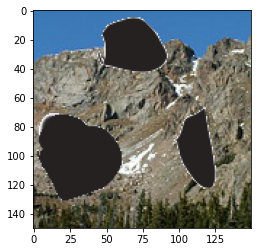

In [11]:
##import Dataset Library
#Files to be processed
import os
os.getcwd()

#Sample Image 1
damage1 = cv2.imread("C:/Users/mechanika/Dropbox/School/CPSC 483 Machine Learning/Project-Main/project-main/epoch100/seg_test/a0.png")
damage1 = cv2.cvtColor(damage1, cv2.COLOR_RGB2BGR)
plt.imshow(damage1)

Text(0.5, 0.98, 'Original & RGB image channels')

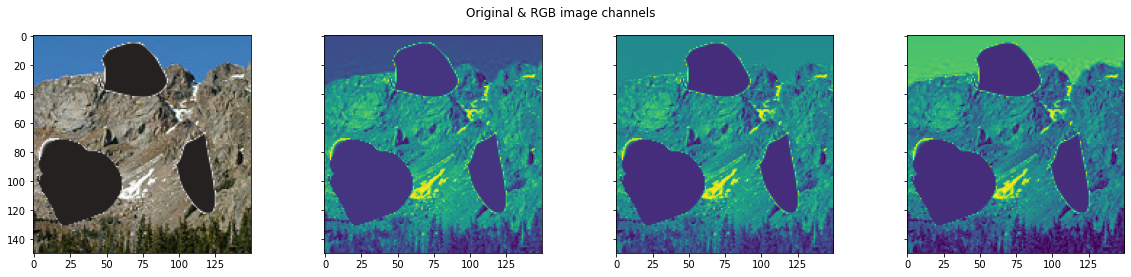

In [15]:
#Data Preprocessing through Normalization
# plotting the original image and the RGB channels
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey="all")
i.set_figwidth(20)

im1.imshow(damage1)  #Original image
im2.imshow(damage1[:, : , 0]) #Red
im3.imshow(damage1[:, : , 1]) #Green
im4.imshow(damage1[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')


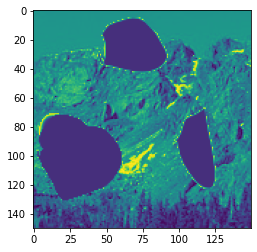

In [28]:
import numpy as np
#This is used to normalize an image which converts the RGB data of an image into a range of integers
gray = cv2.cvtColor(damage1, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap = 'gray')

norm = (gray-np.min(gray))/(np.max(gray) - np.min(gray))
plt.imshow(norm)

# Training Data using an ML algorithm

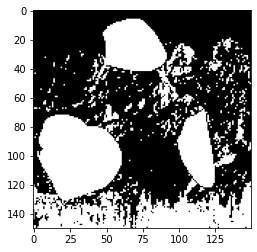

In [30]:
#Create mask
#Increase threshold to only show extremes in black and white
(thresh, mask) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plt.imshow(mask,cmap='Greys_r')

#Invert the mask so that the darkest appears the brightest
mask = cv2.bitwise_not(mask)
plt.imshow(mask,cmap='Greys_r')

# Testing Data by fixing the Images


In [30]:
#Use cv2 to read and fix the damaged image
#Use both the mask and the fixed image

output1 = cv2.inpaint(damage1, mask, 1, cv2.INPAINT_TELEA)
output2 = cv2.inpaint(damage1, mask, 1, cv2.INPAINT_NS)

# Show Before and After Restoration


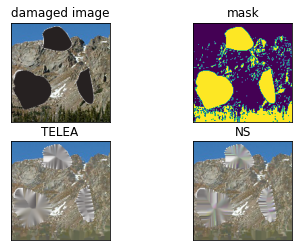

In [32]:
#show plot
damage1 = cv2.imread("C:/Users/mechanika/Dropbox/School/CPSC 483 Machine Learning/Project-Main/project-main/epoch100/seg_test/a0.png")
damage1 = cv2.cvtColor(damage1, cv2.COLOR_RGB2BGR)
output1 = cv2.inpaint(damage1, mask, 1, cv2.INPAINT_TELEA)
output2 = cv2.inpaint(damage1, mask, 1, cv2.INPAINT_NS)
img = [damage1, mask, output1, output2]
titles = ['damaged image', 'mask', 'TELEA', 'NS']
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])
    plt.imshow(img[i])
plt.show()

#  Predictions and Confusion Matrix


In [24]:
#confusion matrix
#this is supposed to show the accuracy of algorithm

test_img = cv2.imread("C:/Users/mechanika/Dropbox/School/CPSC 483 Machine Learning/Project-Main/project-main/epoch100/seg_train")
ori_img = cv2.imread("C:/Users/mechanika/Dropbox/School/CPSC 483 Machine Learning/Project-Main/project-main/epoch100/seg_pred")
cm = confusion_matrix(test_img, ori_img)

ax = sns.heatmap(cm, annot=True, 
                 xticklabels = 'Predicted',
                 yticklabels = 'Actual',
                 fmt='3d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ValueError: Expected array-like (array or non-string sequence), got None